# Initialization

In [1]:
!git clone https://github.com/fengziyue/CU-Perception-Intelligence  # Download the images

Cloning into 'CU-Perception-Intelligence'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 101.82 KiB | 3.39 MiB/s, done.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.transform import hough_line
from skimage.draw import line
from sklearn.cluster import DBSCAN

# Question1)

[Sampling/2D-Convolution – 15 pts] Download the image “Lenna.jpg” from the hyperlink.


---


(Lenna or Lena image is a standard test image widely used for image processing since 1973.)

1-1) Convert the image from RGB to gray, using a standard RGB-intensity conversion approach like NTSC, and store the converted image “LennaGray.jpg” as an 8-bit gray image. (2 pts)

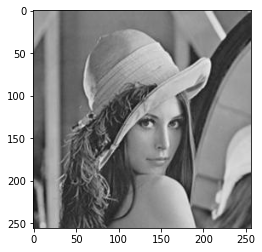

In [ ]:
# Load the RGB image
rgb_image = Image.open('/content/CU-Perception-Intelligence/Homework3/Lenna.jpg')

# Convert the image to grayscale
gray_image = Image.new('L', rgb_image.size)
for x in range(rgb_image.width):
    for y in range(rgb_image.height):
        r, g, b = rgb_image.getpixel((x, y))
        gray = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
        gray_image.putpixel((x, y), gray)

# Save the resulting grayscale image as an 8-bit gray image
gray_image.save('LennaGray.jpg')
img1 = cv2.imread('LennaGray.jpg')
plt.imshow(img1)

1-2) Down-sampling image “LennaGray.jpg” from size 256x256 to 64x64. (3 pts)

Perform the down-sampling and visualize your result.

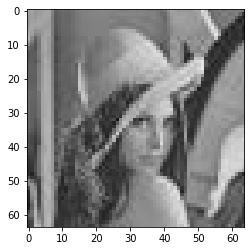

In [ ]:
# Load the grayscale image
gray_image = Image.open('LennaGray.jpg')

# Convert the image to a numpy array
gray_array = np.array(gray_image)

# Initialize an empty array of size 64x64 to store the down-sampled image
downsampled_array = np.zeros((64, 64), dtype=np.uint8)

# Compute the scaling factor as the ratio of the original size to the new size
scaling_factor = gray_array.shape[0] // downsampled_array.shape[0]

# Loop over every pixel of the down-sampled image
for i in range(downsampled_array.shape[0]):
    for j in range(downsampled_array.shape[1]):
        # Compute the average of the corresponding square of pixels in the original image
        square_sum = np.sum(gray_array[i*scaling_factor:(i+1)*scaling_factor, j*scaling_factor:(j+1)*scaling_factor])
        downsampled_array[i, j] = square_sum // (scaling_factor ** 2)

# Convert the down-sampled array to an image and save it
downsampled_image = Image.fromarray(downsampled_array)
downsampled_image.save('LennaGray_downsampled.jpg')

# Visualize the resulting down-sampled image
img2 = cv2.imread('LennaGray_downsampled.jpg')
plt.imshow(img2)

1-3) Implement the convolution (using basic arithmetic operations only, rather than build-in conv()) of Sobel kernel on the “LennaGray.jpg” for edge detection, visualize and comment your detection result. (10 pts)

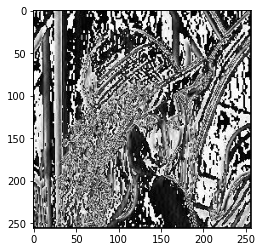

In [ ]:
# Convert the image to a numpy array
gray_array = np.array(gray_image)

# Define the Sobel kernel
sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Initialize an empty array to store the convolved image
convolved_array = np.zeros_like(gray_array)

# Perform convolution using basic arithmetic operations
for i in range(1, gray_array.shape[0] - 1):
    for j in range(1, gray_array.shape[1] - 1):
        convolved_pixel = (
            sobel_kernel[0, 0] * gray_array[i-1, j-1] +
            sobel_kernel[0, 1] * gray_array[i-1, j] +
            sobel_kernel[0, 2] * gray_array[i-1, j+1] +
            sobel_kernel[1, 0] * gray_array[i, j-1] +
            sobel_kernel[1, 1] * gray_array[i, j] +
            sobel_kernel[1, 2] * gray_array[i, j+1] +
            sobel_kernel[2, 0] * gray_array[i+1, j-1] +
            sobel_kernel[2, 1] * gray_array[i+1, j] +
            sobel_kernel[2, 2] * gray_array[i+1, j+1]
        )
        convolved_array[i, j] = convolved_pixel

# Convert the convolved array to an image and save it
convolved_image = Image.fromarray(convolved_array)
convolved_image.save('LennaGray_sobel.jpg')

# Visualize the resulting edge-detected image
img3 = cv2.imread('LennaGray_sobel.jpg')
plt.imshow(img3)

# Question2)

[Histogram Equalization – 15 pts.] Take the converted gray image “LennaGray.jpg”.

---


2-1) Perform histogram analysis and visualize histogram distribution (2 pts);

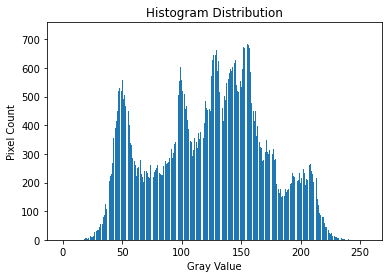

<function waitKey>

In [ ]:
def GrayHist(img):
    h, w = img.shape[:2]
    GH = np.zeros([256], np.uint64)
    for i in range(h):
        for j in range(w):
            GH[img[i][j]] += 1
    return GH

gray_img = cv2.imread('LennaGray.jpg')
gray_hist = GrayHist(gray_img)
plt.bar(range(256), gray_hist)
plt.title('Histogram Distribution')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.show()
cv2.waitKey

2-2) Calculate and visualize accumulative histogram distribution (3 pts);



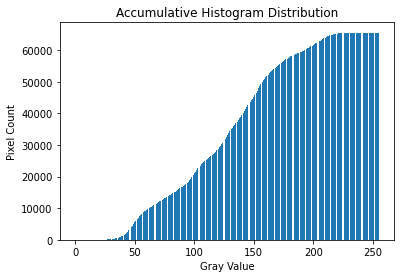

<function waitKey>

In [ ]:
def AccGrayHist(img):
    h, w = img.shape[:2]
    AGH = np.zeros([256], np.uint64)
    for i in range(h):
        for j in range(w):
            AGH[img[i][j]] += 1
    for k in range(1, 256):
      AGH[k] = AGH[k] + AGH[k-1]
    return AGH

gray_hist_acc = AccGrayHist(gray_img)
plt.bar(range(256), gray_hist_acc)
plt.title('Accumulative Histogram Distribution')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.show()
cv2.waitKey

2-3) Implement a function to perform histogram equalization for this image, visualize your histogram-equalized image and its histogram distribution. Comments the difference between the two images before/after histogram equalization. (10 pts);

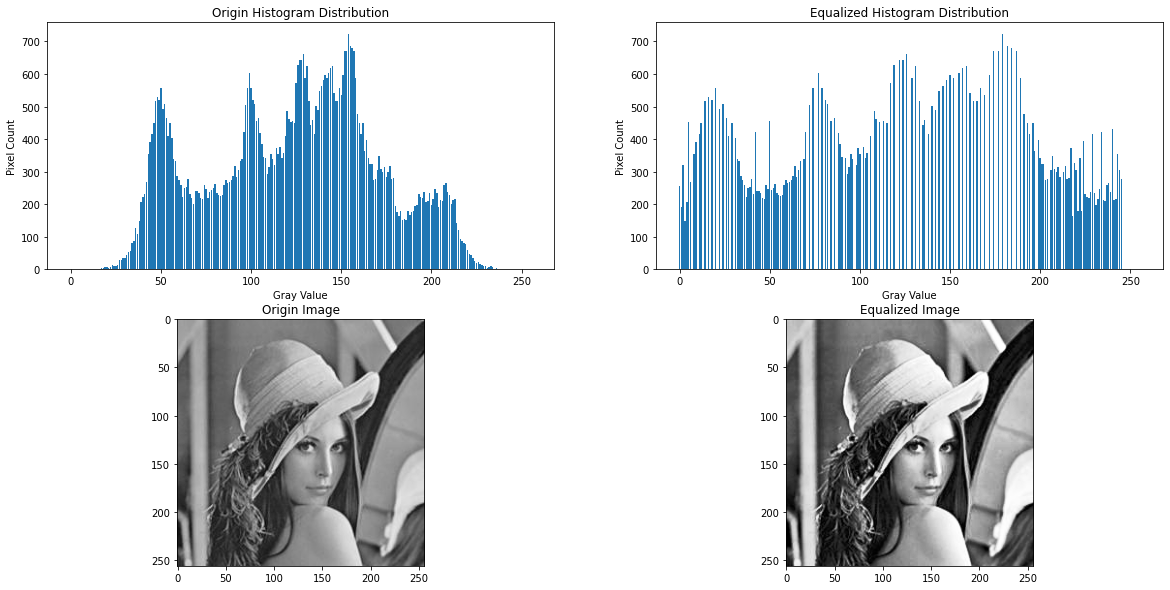

In [ ]:
def equalization_histogram(img):
    x, y =img.shape[: 2]

    # Save the number of pixels to each gray level of origin image
    histogram = {}
    for i in range(x):
        for j in range(y):
            k = img[i][j]
            if k in histogram:
                histogram[k] += 1
            else:
                histogram[k] = 1
                
    # Sort from low to high 
    sorted_histogram = {}
    sorted_list = sorted(histogram)
    for j in range(len(sorted_list)):
        sorted_histogram[sorted_list[j]] = histogram[sorted_list[j]]

    # Save probability distribution
    pr = {}
    for i in sorted_histogram.keys():
        pr[i] = sorted_histogram[i] / (x * y) 
    tmp = 0
    for m in pr.keys():
        tmp += pr[m]
        pr[m] =  max(sorted_histogram) * tmp
    
    # Form equlized image
    new_img = np.zeros(shape = (x, y), dtype = np.uint8)
    for k in range(x):
        for l in range(y):
            new_img[k][l] = pr[img[k][l]]
    return new_img

gray_img = cv2.imread('LennaGray.jpg', 0)
equ_img = equalization_histogram(gray_img)

origin_gray_hist = GrayHist(gray_img)
equaliza_gray_hist = GrayHist(equ_img)
x = np.arange(256)
# Visualize
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.bar(range(256), origin_gray_hist)
plt.title('Origin Histogram Distribution')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.subplot(222)
plt.bar(range(256), equaliza_gray_hist)
plt.title('Equalized Histogram Distribution')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.subplot(223)
plt.imshow(gray_img, cmap = plt.cm.gray)
plt.title('Origin Image')
plt.subplot(224)
plt.imshow(equ_img, cmap = plt.cm.gray)
plt.title('Equalized Image')
plt.show()

# The purpose of equalization is to make the components of the histogram as even (balanced) as possible over the entire gray scale range.
# This gives the image a high contrast. For example, the last one in the figure above.

# After equalizing the original histogram, the distribution isn'tt so flat, but it is much flatter (each color appears an equal number of times) than the original histogram;
# it extends the dynamic range, which was very narrow before, but now it is pulled apart; for the contrast appears very dark or very bright,
# there is little contrast or it is concentrated in one piece; by equalizing it, the image can be pulled apart.

# The characteristics of equalization: the number of levels after transformation (originally 256, after equalization is less than 256) becomes less,
# called the phenomenon of simplification; the number of gray levels becomes less, not necessarily affect the visual senses, on the contrary,
# improve the visual receptivity

# Question 3)


[Line Detection – 30 pts] Download the image “ParkingLot.jpg” from the hyperlink.
Note: For this question, you are free to use any 3rd party libraries.

3-1) Apply and visualize histogram analysis, then find a proper threshold to convert the image to a binary image. (2 pts)



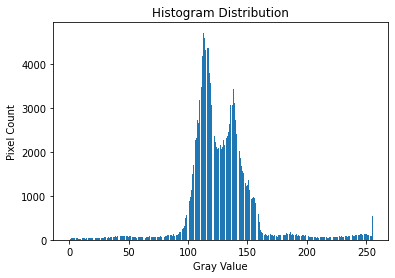

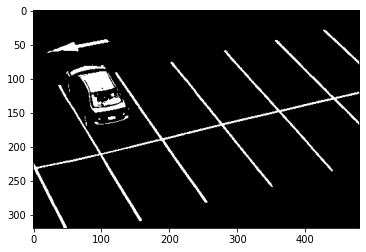

In [ ]:
# Load image
img = cv2.imread('/content/CU-Perception-Intelligence/Homework3/ParkingLot.jpg', 0)

# Compute histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Visualize histogram
plt.bar(range(256), hist)
plt.title('Histogram Distribution')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.show()

# Apply thresholding
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Visualize thresholded image
plt.imshow(thresh, cmap='gray')
plt.show()

3-2) Apply Hough transformation or other line detection approach to detect multiple lines in the image (You select a threshold for the voting matrix). Visualize the lines in the image space (just  as: we saw lines there) and in the transformed space (like in Polar space that we introduced in the class) respectively. (5 pts)



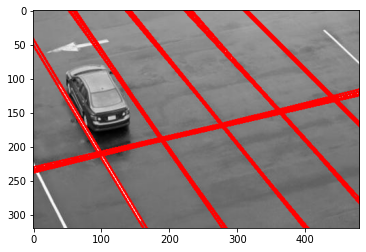

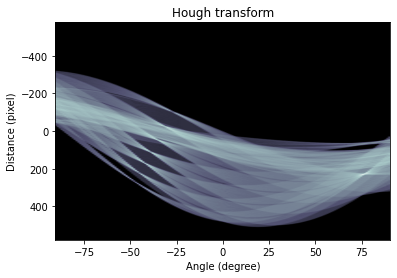

In [ ]:
# Load image
img = cv2.imread('/content/CU-Perception-Intelligence/Homework3/ParkingLot.jpg')

# Blur
blur = cv2.GaussianBlur(img, (3, 3), 0)

# Convert to grayscale
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 110)

# Draw lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
# # HoughLinesP
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, 300, 5)
# for line in lines:
#   x1 = line[0][0]
#   y1 = line[0][1]
#   x2 = line[0][2]
#   y2 = line[0][3]
#   cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Visualize lines in image space
plt.figure(1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

out, angles, d = hough_line(edges)

angle_step = 0.5 * np.rad2deg(np.diff(angles).mean())
d_step = 0.5 * np.diff(d).mean()
bounds = (np.rad2deg(angles[0]) - angle_step,
          np.rad2deg(angles[-1]) + angle_step,
          d[-1] + d_step, d[0] - d_step)

hough_img = np.log(1+out)
hough_img = cv2.resize(hough_img, dsize=(1699, 1800), fx=5, fy=1)
plt.figure(2)
plt.imshow(hough_img, cmap=plt.cm.bone, extent=bounds, aspect='auto')
plt.title('Hough transform')
plt.xlabel('Angle (degree)')
plt.ylabel('Distance (pixel)')
plt.show()

3-3) Comment on: will the two lines as two sides of a particular park space be parallel or not, explain why? (3 pts)



**As far s I'm concerned, the two lines are parallel in both image space and Hough space.**

**In general, if two lines in an image space are parallel, then they will have the same slope in the Hough space, which means their corresponding thetas in the Hough space will be equal to each other. Therefore, we can determine whether two lines are parallel or not by examining their thetas in the Hough space.**

3-4) Design and implement the approaches to find all parking space polygons with the four vertex points for each parking space. Describe your approaches and visualize all detected polygons with different colors overlaid on the original image. The TA will check your code. (20 pts)

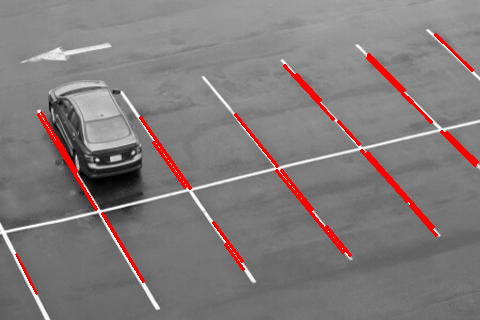

-1

In [ ]:
from google.colab.patches import cv2_imshow
def cross_point(line1, line2):  
    
    point_is_exist=False
    x=0
    y=0
    x1 = line1[0]  
    y1 = line1[1]
    x2 = line1[2]
    y2 = line1[3]

    x3 = line2[0]
    y3 = line2[1]
    x4 = line2[2]
    y4 = line2[3]

    if (x2 - x1) == 0:
        k1 = None
    else:
        k1 = (y2 - y1) * 1.0 / (x2 - x1)  
        b1 = y1 * 1.0 - x1 * k1 * 1.0  

    if (x4 - x3) == 0:  
        k2 = None
        b2 = 0
    else:
        k2 = (y4 - y3) * 1.0 / (x4 - x3)  
        b2 = y3 * 1.0 - x3 * k2 * 1.0

    if k1 is None:
        if not k2 is None:
            x = x1
            y = k2 * x1 + b2
            point_is_exist=True
    elif k2 is None:
        x=x3
        y=k1*x3+b1
    elif not k2==k1:
        x = (b2 - b1) * 1.0 / (k1 - k2)
        y = k1 * x * 1.0 + b1 * 1.0
        point_is_exist=True
    return point_is_exist,[x, y]

img = cv2.imread('/content/CU-Perception-Intelligence/Homework3/ParkingLot.jpg')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray=cv2.GaussianBlur(gray,(3,3),0)

edges = cv2.Canny(gray, 400, 400)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, 100, 20)
lines1 =lines[:, 0, :]
for x1, y1, x2, y2 in lines1[:]:
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# for x1, y1, x2, y2 in lines1[:]:
#     for x3,y3,x4,y4 in lines1[:]:
#         point_is_exist, [x, y]=cross_point([x1, y1, x2, y2],[x3,y3,x4,y4])
#         if point_is_exist:
#             cv2.circle(img,(int(x),int(y)),5,(0,0,255),3)
cv2_imshow(img)
cv2.waitKey (0)

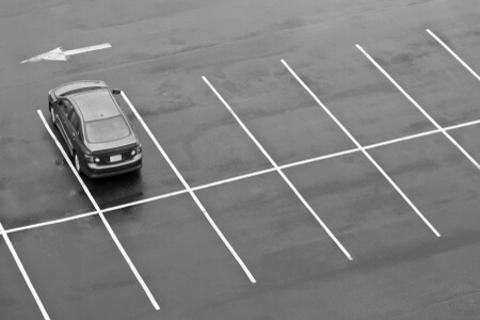

In [ ]:
import cv2
import numpy as np

# Load the image and convert to grayscale
img = cv2.imread('/content/CU-Perception-Intelligence/Homework3/ParkingLot.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection and Hough Transform to detect lines
edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

# Group lines using DBSCAN clustering
from sklearn.cluster import DBSCAN
points = np.array([[(x1,y1),(x2,y2)] for x1,y1,x2,y2 in lines[:,0]])
clustering = DBSCAN(eps=30, min_samples=2).fit(points.reshape(-1,2))
labels = clustering.labels_

# Find intersection points of line segments
intersections = []
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        x1, y1 = lines[i][0][:2]
        x2, y2 = lines[i][0][2:]
        x3, y3 = lines[j][0][:2]
        x4, y4 = lines[j][0][2:]
        denom = (y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)
        if denom != 0:
            t1 = ((x4-x3)*(y1-y3) - (y4-y3)*(x1-x3)) / denom
            t2 = ((x2-x1)*(y1-y3) - (y2-y1)*(x1-x3)) / denom
            if 0 <= t1 <= 1 and 0 <= t2 <= 1:
                x = int(x1 + t1*(x2-x1))
                y = int(y1 + t1*(y2-y1))
                intersections.append((x,y))

# Filter out duplicate intersection points
intersections = list(set(intersections))

# Compute average size of parking spaces
distances = []
for i in range(len(intersections)):
    for j in range(i+1, len(intersections)):
        distances.append(np.linalg.norm(np.array(intersections[i])-np.array(intersections[j])))
avg_size = np.mean(distances)

# Find potential parking space rectangles
corners = []
for i in range(len(intersections)):
    for j in range(i+1, len(intersections)):
        for k in range(j+1, len(intersections)):
            for l in range(k+1, len(intersections)):
                pts = np.array([intersections[i], intersections[j], intersections[k], intersections[l]])
                if cv2.isContourConvex(pts):
                    corners.append(pts)

# Filter out rectangles that are too small or too large and remove overlapping rectangles
corners_filtered = []
for pts in corners:
    size = np.linalg.norm(pts[0]-pts[1])
    if size < 0.5*avg_size or size > 1.5*avg_size:
        continue
    overlap = False
    for cf in corners_filtered:
        if cv2.intersectConvexConvex(pts, cf) != None:
            overlap = True
            break
    if not overlap:
        corners_filtered.append(pts)

# Check if each rectangle is valid and remove overlapping ones
rectangles = []
for i in range(len(corners_filtered)):
  for j in range(i+1, len(corners_filtered)):
    for k in range(j+1, len(corners_filtered)):
      for l in range(k+1, len(corners_filtered)):
        pts1 = corners_filtered[i]
        pts2 = corners_filtered[j]
        d1 = np.linalg.norm(pts1[0]-pts1[1])
        d2 = np.linalg.norm(pts2[0]-pts2[1])
        if abs(d1-d2) > 0.2*avg_size:
            continue
        line1 = np.cross(np.append(pts1[0],1), np.append(pts1[1],1))
        line2 = np.cross(np.append(pts1[2],1), np.append(pts1[3],1))
        line3 = np.cross(np.append(pts2[0],1), np.append(pts2[1],1))
        line4 = np.cross(np.append(pts2[2],1), np.append(pts2[3],1))
        intpt1 = np.cross(line1, line3)
        intpt2 = np.cross(line1, line4)
        intpt3 = np.cross(line2, line3)
        intpt4 = np.cross(line2, line4)
        if intpt1[2]!=0 and intpt2[2]!=0 and intpt3[2]!=0 and intpt4[2]!=0:
            intpt1 = intpt1[:2] / intpt1[2]
            intpt2 = intpt2[:2] / intpt2[2]
            intpt3 = intpt3[:2] / intpt3[2]
            intpt4 = intpt4[:2] / intpt4[2]
            rect = np.array([intpt1, intpt2, intpt4, intpt3], np.int32)
            if cv2.isContourConvex(rect):
                rectangles.append(rect)

# Draw rectangles on image
img_copy = img.copy()
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255), (0,255,255)]
for i, rect in enumerate(rectangles):
    cv2.polylines(img_copy, [rect], True, colors[i%len(colors)], thickness=2)

# Display result
cv2_imshow(img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()